In [68]:
import heapq
import weightedGraph 
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Менш ефективна реалізація за рахунок лінійного пошуку
def dijkstra(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа з вершинами, що індексуються з 1.

    graph: об'єкт класу weightedGraph, який представляє зважений граф
    start: стартова вершина (індексується з 1)
    return: два словники - distances (мінімальні відстані) та previous (попередники на шляху), час
    """
    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()
    
    n = graph.num_vertices
    # Ініціалізуємо словник відстаней до всіх вершин значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини 0
    
    # Ініціалізуємо словник попередників для відновлення шляху
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)
    current_vertex = start  # Починаємо зі стартової вершини

    while True:
        # Оновлюємо відстані для сусідів поточної вершини
        for neighbor, weight in graph.graph[current_vertex]:
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Обчислюємо нову відстань до сусіда
            new_distance = distances[current_vertex] + weight
            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Шукаємо наступну вершину з найменшою відстанню
        next_vertex = None
        min_distance = float('inf')
        for vertex in range(1, n + 1):
            # Вибираємо невідвідану вершину з мінімальною відстанню
            if not visited[vertex] and distances[vertex] < min_distance:
                min_distance = distances[vertex]
                next_vertex = vertex

        if next_vertex is None:
            # Якщо більше немає вершин для обробки, виходимо з циклу
            break

        # Переходимо до наступної вершини
        current_vertex = next_vertex
     
    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time



In [5]:
def dijkstra_h(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа з використанням черги з пріоритетом (мін-купи).

    :param graph: об'єкт класу weightedGraph
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані) та previous (попередники на шляху)
    """

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = graph.num_vertices  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf' (нескінченність)
    distances = {v: float('inf') for v in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {v: None for v in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)
    
    # Черга з пріоритетом (мін-купа), яка буде зберігати вершини для обробки
    priority_queue = [(0, start)]  # (поточна відстань, вершина)

    while priority_queue:
        # Вибираємо вершину з мінімальною відстанню (дістаємо з мін-купи)
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Пропускаємо вершину, якщо вона вже була відвідана
        if visited[current_vertex]:
            continue

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Оновлюємо відстані для сусідів поточної вершини
        for neighbor, weight in graph.graph[current_vertex]:
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Обчислюємо нову можливу відстань до сусіда через поточну вершину
            new_distance = current_distance + weight

            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex
                # Додаємо сусіда до черги з пріоритетом з новою відстанню
                heapq.heappush(priority_queue, (new_distance, neighbor))

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [6]:
def dijkstra_m(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа, представленого матрицею суміжності.
    
    :param graph: об'єкт класу weightedGraph, який представляє матрицю суміжності
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані до вершин) та previous (попередники на шляху)
    """
    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)

    current_vertex = start  # Починаємо з початкової вершини

    while True:
        # Оновлюємо відстані для всіх сусідів поточної вершини
        for neighbor in range(1, n + 1):
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Отримуємо вагу ребра між поточною вершиною і сусідом (індексація з 0 для матриці)
            weight = graph[current_vertex - 1][neighbor - 1]
            if weight == float('inf'):  # Якщо немає ребра, пропускаємо
                continue

            # Обчислюємо нову можливу відстань до сусіда через поточну вершину
            new_distance = distances[current_vertex] + weight

            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Шукаємо наступну вершину з мінімальною відстанню
        next_vertex = None
        min_distance = float('inf')
        for vertex in range(1, n + 1):
            if not visited[vertex] and distances[vertex] < min_distance:
                min_distance = distances[vertex]
                next_vertex = vertex

        # Якщо немає більше вершин для обробки, виходимо з циклу
        if next_vertex is None:
            break

        # Переходимо до наступної вершини
        current_vertex = next_vertex

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [7]:
import heapq

def dijkstra_mh(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа, представленого матрицею суміжності,
    з використанням черги з пріоритетом для покращення ефективності.

    :param graph: об'єкт класу weightedGraph, який представляє матрицю суміжності
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані до вершин) та previous (попередники на шляху)
    """
    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf'
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Черга з пріоритетом для вибору вершин з мінімальною відстанню
    priority_queue = [(0, start)]  # (distance, vertex)
    
    visited = [False] * (n + 1)  # Масив для відмітки відвіданих вершин

    while priority_queue:
        # Вибираємо вершину з мінімальною відстанню
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if visited[current_vertex]:
            continue  # Пропускаємо вже відвідані вершини

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True
        
        # Оновлюємо відстані для всіх сусідів поточної вершини
        for neighbor in range(1, n + 1):
            weight = graph[current_vertex - 1][neighbor - 1]  # Вага ребра
            if weight == float('inf') or visited[neighbor]:  # Пропускаємо, якщо немає ребра або вершина відвідана
                continue

            new_distance = current_distance + weight  # Обчислюємо нову можливу відстань
            
            if new_distance < distances[neighbor]:  # Якщо новий шлях коротший
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex
                heapq.heappush(priority_queue, (new_distance, neighbor))  # Додаємо сусіда до черги з новою відстанню

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [8]:
for i in range (500+1):
    n = 5
    p = 0.5 
    random_graph = weightedGraph.randomWeightedGraph(n, p)
    paths = dijkstra(random_graph, 1)
    paths_h = dijkstra_h(random_graph, 1)
    paths_m = dijkstra_m(random_graph, 1)
    if paths[:-1] != paths_h[:-1]:
        print("ups1")
        print(paths, paths_h)
    if paths[:-1] != paths_m[:-1]:
        print("Ups2")
        print(paths[0], paths_m[0])
        

In [9]:
def bellman_ford(graph, start):
    """
    Алгоритм Беллмана-Форда для графа, представленного списком суміжності.
    
    :param graph: словник, представляючий граф як список суміжності {вершина: [(сосід, вага)]}
    :param start: стартова вершина
    :return: словник відстаней до всіх вершин, попередні вершини, True якщо знайдено від'ємний цикл
    """

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    # Ініціалізуємо відстані до всіх вершин значенням 'inf' (нескінченність)
    n = graph.num_vertices  # Отримуємо кількість вершин у графі
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}  # Відстані до вершин
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    graph = graph.graph  # Отримуємо список суміжності графа

    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}

    for _ in range(n - 1):
        for vertex in graph:  # Проходимо по всім вершинам графа
            for neighbor, weight in graph[vertex]:  # Проходимо по сусідам та їх вагам
                # Якщо нова відстань менша, оновлюємо відстань і попередника
                if distances[vertex] + weight < distances[neighbor]:
                    distances[neighbor] = distances[vertex] + weight
                    previous[neighbor] = vertex

    # Перевіряємо на наявність від'ємних циклів
    for vertex in graph:
        for neighbor, weight in graph[vertex]:
            # Якщо можемо ще більше зменшити відстань, то знайдений від'ємний цикл
            if distances[vertex] + weight < distances[neighbor]:
                print("Negative Cycle")
                return distances, previous, True  # Повертаємо True якщо знайдено від'ємний цикл

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    
    return distances, previous, False, total_time



In [10]:
def bellman_ford_matrix(graph, start):
    """
    Алгоритм Беллмана-Форда для графа, представленного матрицею суміжності.
    
    :param graph: двумірний масив, що представляє матрицю суміжності
    :param start: стартова вершина
    :return: словник відстаней до всіх вершин, попередні вершини, True якщо знайдено від'ємний цикл
    """
    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо відстані до всіх вершин значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    for _ in range(n - 1):
        for u in range(n):  # Проходимо по всім вершинам графа
            for v in range(n):  # Проходимо по всім сусідам
                weight = graph[u][v]  # Отримуємо вагу ребра між вершинами u та v
                # Якщо вага не є 'inf' (немає ребра) і нова відстань менша, оновлюємо відстань і попередника
                if weight != float('inf') and distances[u + 1] + weight < distances[v + 1]:
                    distances[v + 1] = distances[u + 1] + weight
                    previous[v + 1] = u + 1  # Зберігаємо попередню вершину
    
    # Перевіряємо на наявність від'ємних циклів
    for u in range(n):
        for v in range(n):
            weight = graph[u][v]  # Отримуємо вагу ребра
            # Якщо можемо ще більше зменшити відстань, то знайдений від'ємний цикл
            if weight != float('inf') and distances[u + 1] + weight < distances[v + 1]:
                print("Negative Cycle")  # Виводимо повідомлення про від'ємний цикл
                return distances, previous, True  # Повертаємо True, якщо знайдено від'ємний цикл
            
    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time
    
    return distances, previous, False, total_time


In [11]:
n = 5
p = 0.7 
random_graph = weightedGraph.randomWeightedGraph(n, p)

In [12]:
bellman_ford(random_graph, 1)

({1: 0, 2: 5, 3: 5, 4: 4, 5: 2}, {1: None, 2: 4, 3: 1, 4: 1, 5: 1}, False, 0.0)

In [13]:
dijkstra(random_graph, 1)

({1: 0, 2: 5, 3: 5, 4: 4, 5: 2}, {1: None, 2: 4, 3: 1, 4: 1, 5: 1}, 0.0)

In [14]:
bellman_ford_matrix(random_graph, 1)

({1: 0, 2: 5, 3: 5, 4: 4, 5: 2}, {1: None, 2: 4, 3: 1, 4: 1, 5: 1}, False, 0.0)

In [15]:
def check_functions_time(max_vertices, p, iterations=50):
    vertex_counts = []
    times = { 'dijkstra': [], 'dijkstra_h': [], 'dijkstra_m': [], 
              'dijkstra_mh': [], 'bellman_ford': [], 'bellman_ford_matrix': [] }
    functions = [
        ('dijkstra', dijkstra),
        ('dijkstra_h', dijkstra_h),
        ('dijkstra_m', dijkstra_m),
        ('dijkstra_mh', dijkstra_mh),
        ('bellman_ford', bellman_ford),
        ('bellman_ford_matrix', bellman_ford_matrix)
    ]
    for n in range(5, max_vertices, 20):
        
        vertex_counts.append(n)
        sum_times = { 'dijkstra': 0, 'dijkstra_h': 0, 'dijkstra_m': 0, 'dijkstra_mh': 0, 'bellman_ford': 0, 'bellman_ford_matrix': 0 }

        for _ in range(iterations):
            random_graph = weightedGraph.randomWeightedGraph(n, p)
            random_number = random.randint(1, n)
            
            for name, func in functions:
                result = func(random_graph, random_number)
                exec_time = result[-1]  
                sum_times[name] += exec_time  
        for name in sum_times.keys():
            times[name].append(sum_times[name]/iterations)

    return vertex_counts, times


In [66]:
def check_functions_time_p(max_vertices, p, iterations=100):
    vertex_counts = []
    times = { 'dijkstra_h': [],  'bellman_ford': []}
    functions = [
        ('dijkstra_h', dijkstra_h),
        ('bellman_ford', bellman_ford),
    ]

    for n in range(5, max_vertices, 20):
        
        vertex_counts.append(n)
        sum_times = {'dijkstra_h': 0, 'bellman_ford': 0}

        for _ in range(iterations):
            random_graph = weightedGraph.randomWeightedGraph(n, p)
            random_number = random.randint(1, n)
            
            for name, func in functions:
                result = func(random_graph, random_number)
                exec_time = result[-1]  
                sum_times[name] += exec_time  
        for name in sum_times.keys():
            times[name].append(sum_times[name]/iterations)

    return vertex_counts, times

In [67]:
# Для хранения всех результатов
all_results = {}

# Цикл по значениям p от 0.1 до 1 с шагом 0.1
for p in np.arange(0.1, 1.1, 0.1):  # np.arange генерирует массив чисел с шагом 0.1
    vertex_counts, times = check_functions_time_p(max_vertices=300, p=p, iterations=100)
    all_results[round(p, 1)] = {'vertex_counts': vertex_counts, 'times': times}

In [80]:
all_results

{np.float64(0.1): {'vertex_counts': [5,
   25,
   45,
   65,
   85,
   105,
   125,
   145,
   165,
   185,
   205,
   225,
   245,
   265,
   285],
  'times': {'dijkstra_h': [1.010417938232422e-05,
    1.6236305236816405e-06,
    2.4394989013671873e-05,
    0.00016083717346191407,
    0.00011016368865966797,
    0.0002439260482788086,
    0.0002706146240234375,
    0.00041513681411743165,
    0.00042356014251708984,
    0.0006608319282531738,
    0.0006292390823364257,
    0.0007278895378112792,
    0.000939953327178955,
    0.0015265703201293944,
    0.0015182089805603027],
   'bellman_ford': [9.872913360595702e-06,
    0.00031620025634765625,
    0.0010149431228637694,
    0.0030541539192199705,
    0.009273474216461181,
    0.013703420162200927,
    0.02440976619720459,
    0.03603548526763916,
    0.05225910186767578,
    0.0743743896484375,
    0.09866035461425782,
    0.13300903081893922,
    0.1730121088027954,
    0.24833527326583862,
    0.3192604923248291]}},
 np.float64(0.2

In [75]:
def plot_heatmap_for_function(all_results, function_name):
    # Извлекаем все уникальные значения количества вершин
    all_vertex_counts = sorted(list(set([n for result in all_results.values() for n in result['vertex_counts']])))

    # Извлекаем значения p, исключая p = 1
    all_p_values = sorted([p for p in all_results.keys() if p < 1])

    # Создаем массив для хранения времени выполнения
    heatmap_data = np.zeros((len(all_vertex_counts), len(all_p_values)))

    # Заполняем массив средним временем выполнения
    for j, p in enumerate(all_p_values):
        result = all_results[p]
        for i, n in enumerate(result['vertex_counts']):
            heatmap_data[i, j] = result['times'][function_name][i]

    # Построение тепловой карты
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(heatmap_data, xticklabels=all_p_values, yticklabels=all_vertex_counts, cmap="YlGnBu", annot=True, fmt=".2e")
    ax.set_xlabel("p (Density)")
    ax.set_ylabel("Number of Vertices")
    plt.title(f"Heatmap of {function_name} Execution Time (excluding p=1)")
    plt.show()


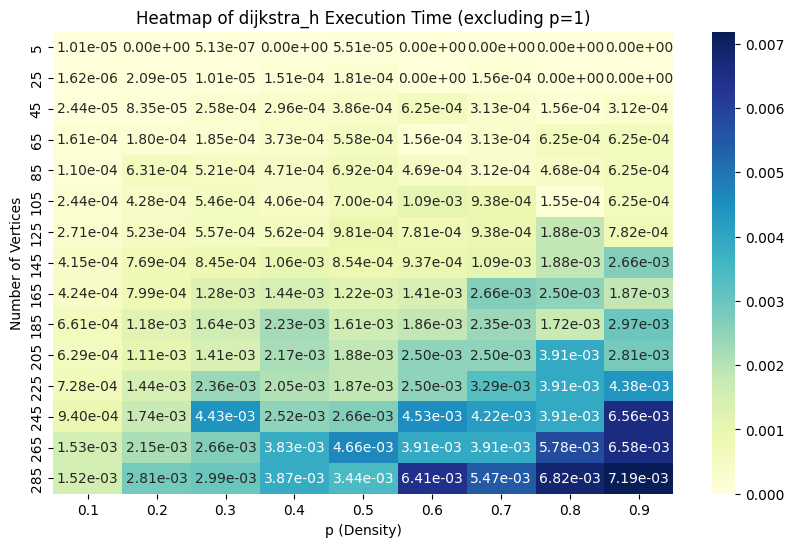

In [76]:

# Построение тепловой карты для dijkstra_h и bellman_ford
plot_heatmap_for_function(all_results, 'dijkstra_h')


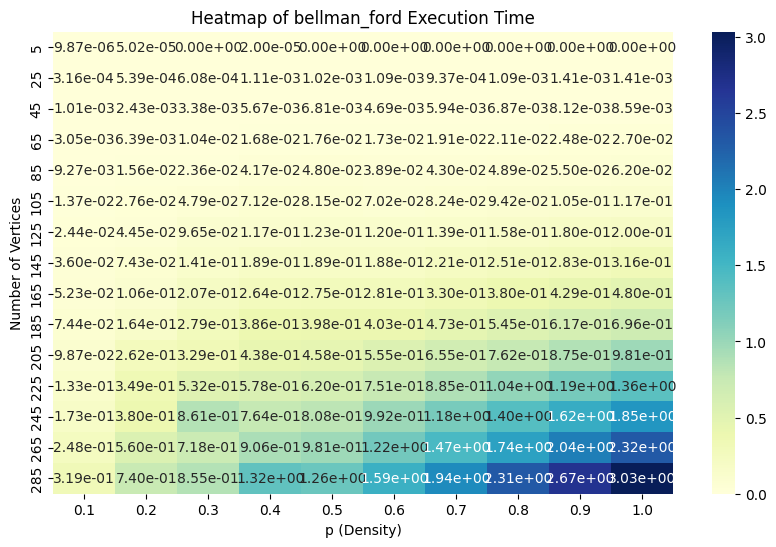

In [71]:
plot_heatmap_for_function(all_results, 'bellman_ford')

In [77]:
def plot_times_for_function(all_results, function_name):
    plt.figure(figsize=(10, 6))
    
    # Цикл по всем значениям p, исключая p = 1
    for p, result in all_results.items():
        if p == 1:  # Пропускаем p=1
            continue
        vertex_counts = result['vertex_counts']
        times = result['times'][function_name]
        
        # Построение графика для данного p
        plt.plot(vertex_counts, times, label=f'p={p}')
    
    # Настройка графика
    plt.title(f'Time vs Vertex Count for {function_name}')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Average Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()


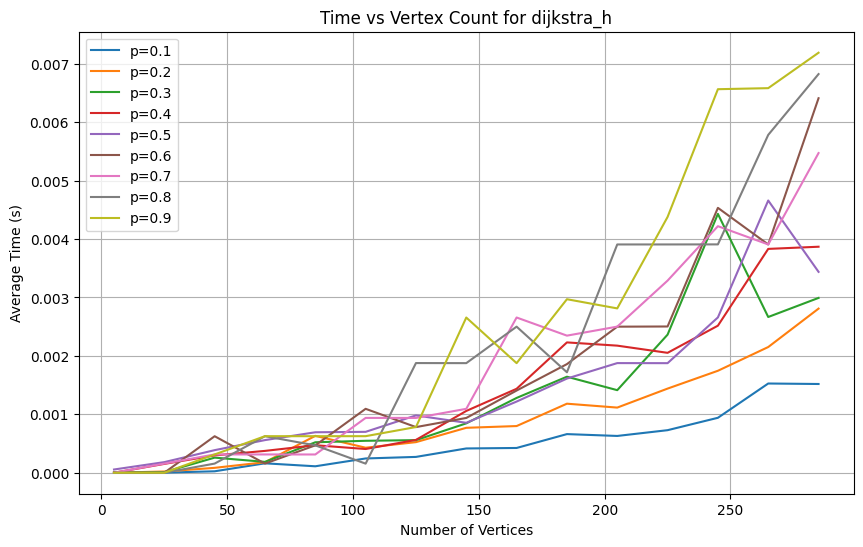

In [78]:

# Построение графиков для обеих функций
plot_times_for_function(all_results, 'dijkstra_h')


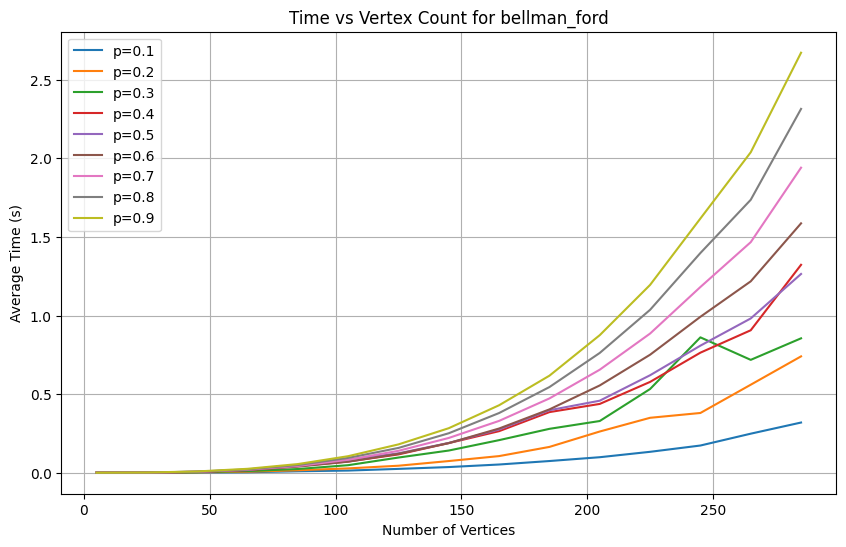

In [79]:
plot_times_for_function(all_results, 'bellman_ford')


In [17]:
vertex_counts_07, avg_times_07 = check_functions_time(max_vertices=300, p=0.7)

In [18]:
vertex_counts_05, avg_times_05 = check_functions_time(max_vertices=300, p=0.5)

In [19]:
vertex_counts_03, avg_times_03 = check_functions_time(max_vertices=300, p=0.3)

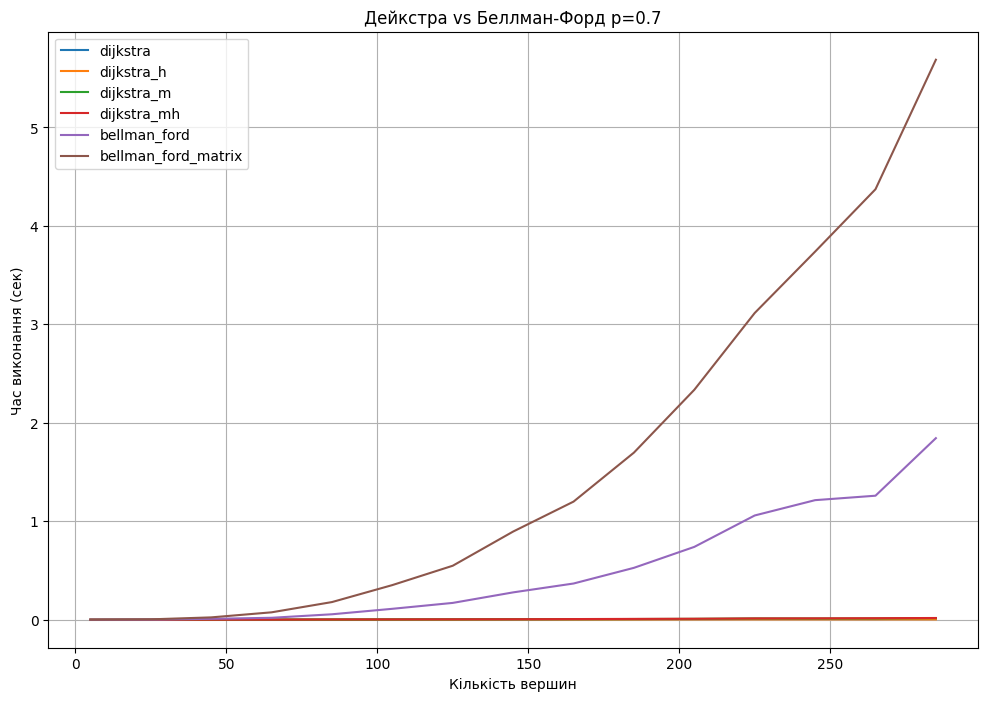

In [56]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_07.keys():
    plt.plot(vertex_counts_07, avg_times_07[name], label=name)

# Настройка графика
plt.title('Дейкстра vs Беллман-Форд p=0.7')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

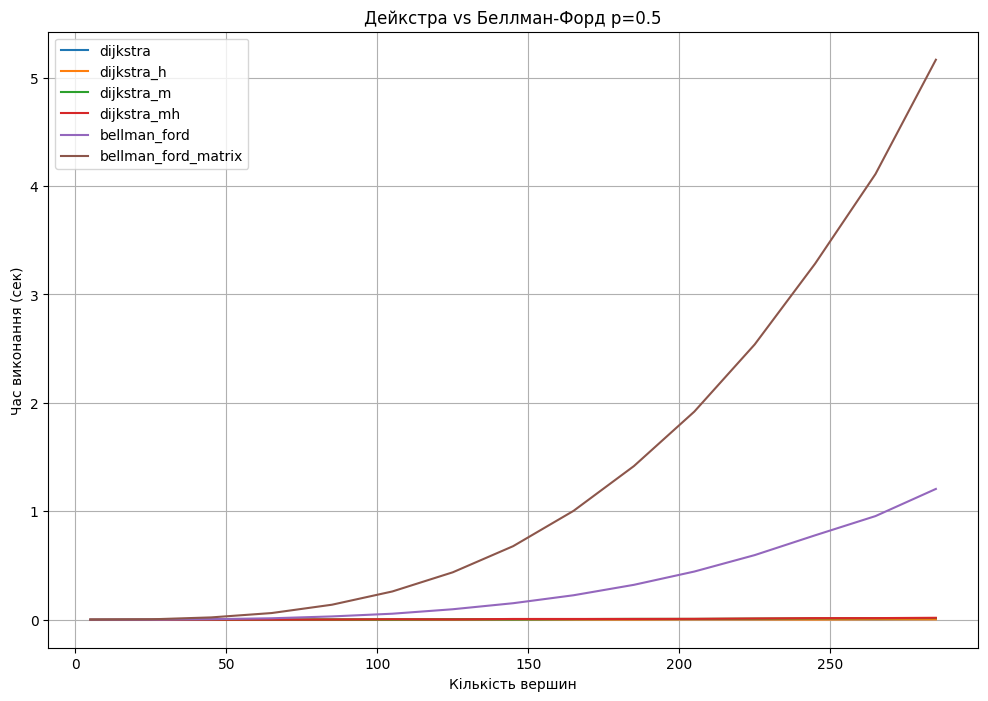

In [57]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_07.keys():
    plt.plot(vertex_counts_05, avg_times_05[name], label=name)

# Настройка графика
plt.title('Дейкстра vs Беллман-Форд p=0.5')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

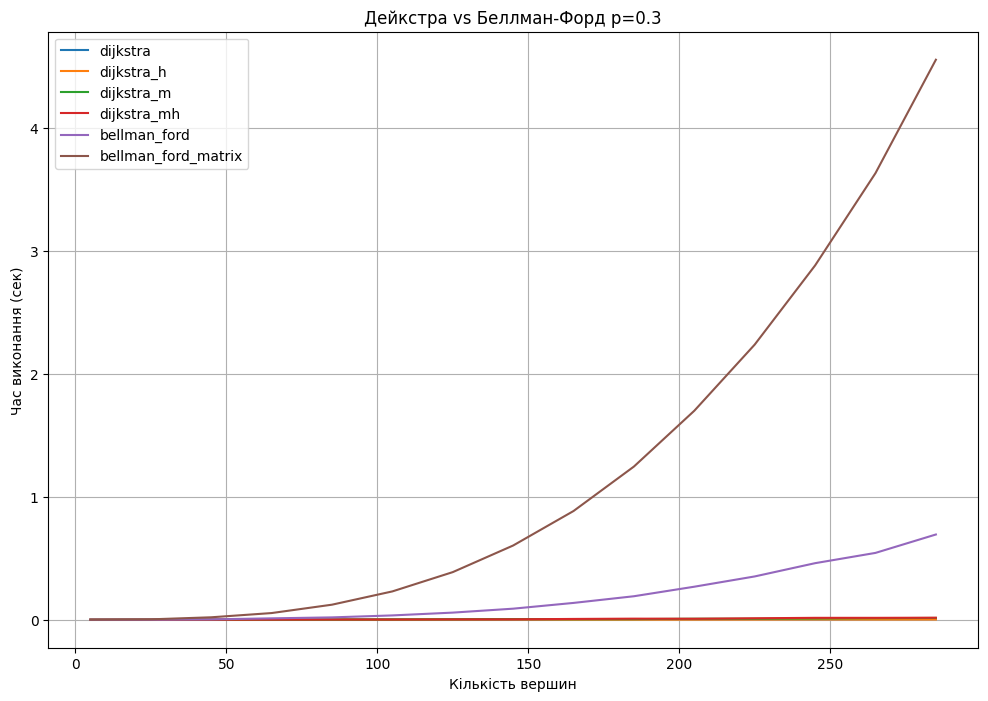

In [58]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_07.keys():
    plt.plot(vertex_counts_03, avg_times_03[name], label=name)

# Настройка графика
plt.title('Дейкстра vs Беллман-Форд p=0.3')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

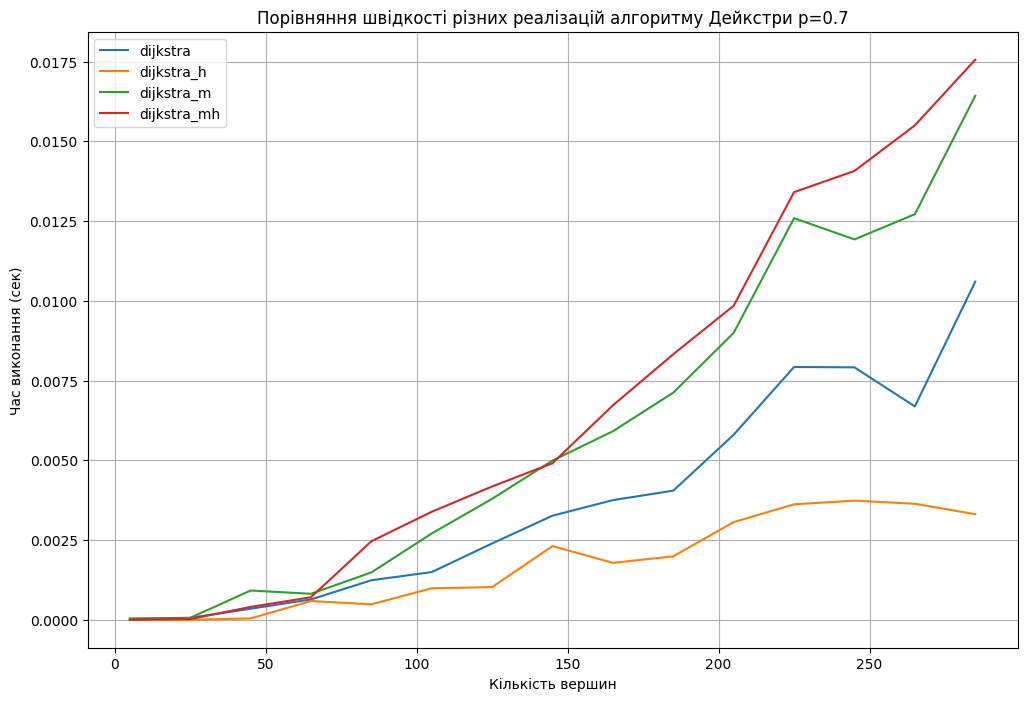

In [54]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_07.keys():
    if name == 'bellman_ford' or name == 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_07, avg_times_07[name], label=name)

# Настройка графика
plt.title('Порівняння швідкості різних реалізацій алгоритму Дейкстри p=0.7')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

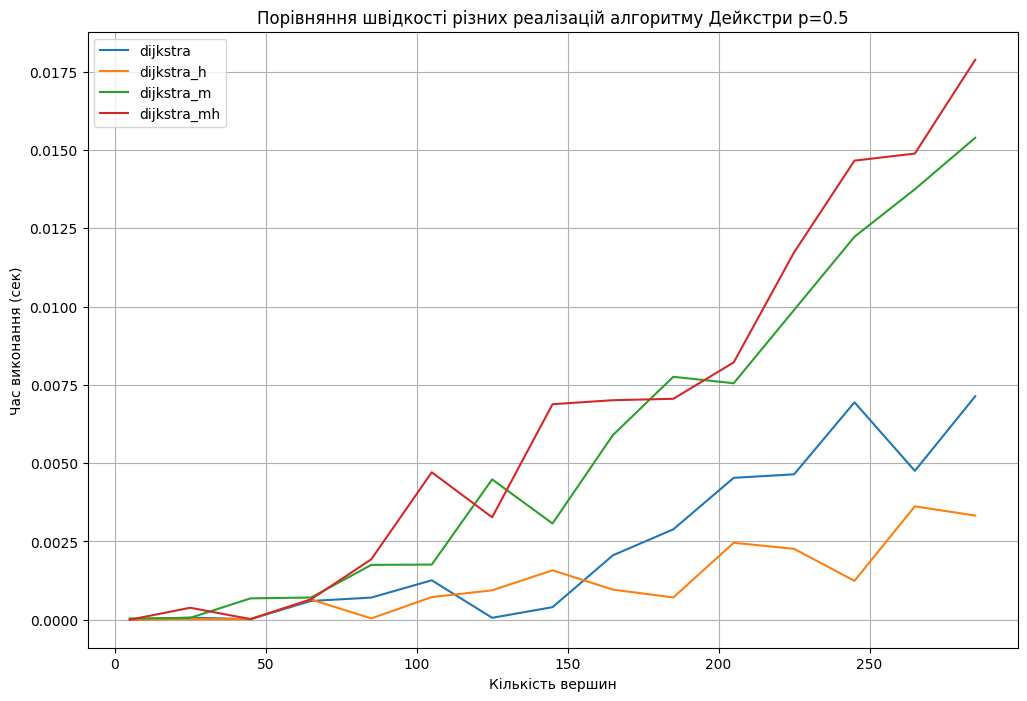

In [50]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_07.keys():
    if name == 'bellman_ford' or name == 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_05, avg_times_05[name], label=name)

# Настройка графика
plt.title('Порівняння швідкості різних реалізацій алгоритму Дейкстри p=0.5')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

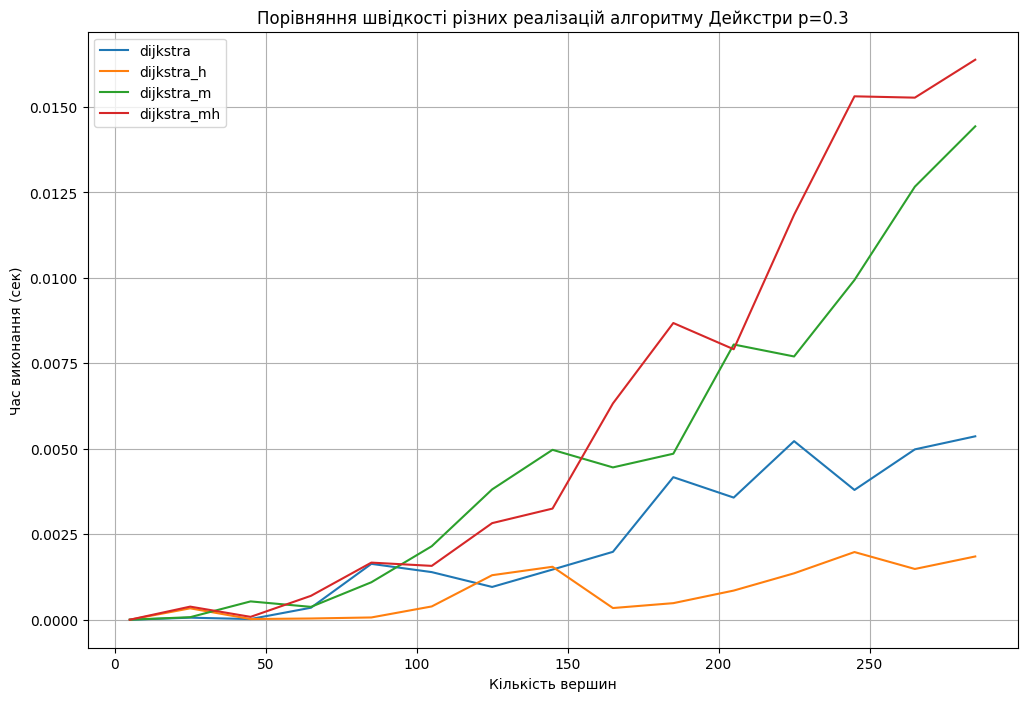

In [51]:
# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times_03.keys():
    if name == 'bellman_ford' or name == 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_03, avg_times_03[name], label=name)

# Настройка графика
plt.title('Порівняння швідкості різних реалізацій алгоритму Дейкстри p=0.3')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

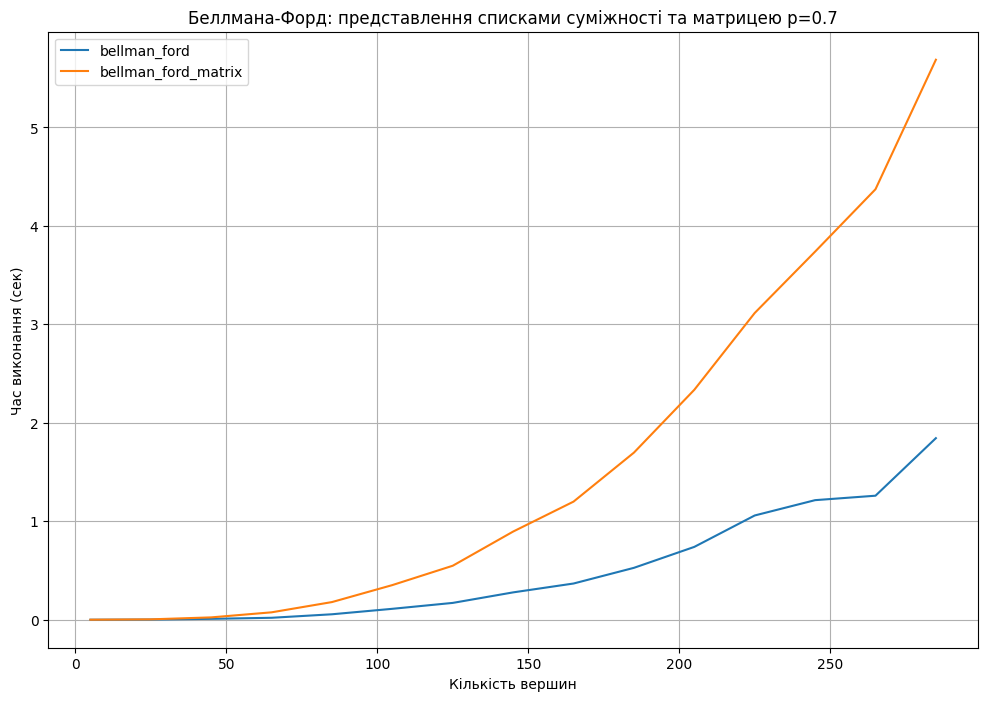

In [61]:
plt.figure(figsize=(12, 8))

for name in avg_times_07.keys():
    if name != 'bellman_ford' and name != 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_07, avg_times_07[name], label=name)

plt.title('Беллмана-Форд: представлення списками суміжності та матрицею p=0.7')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

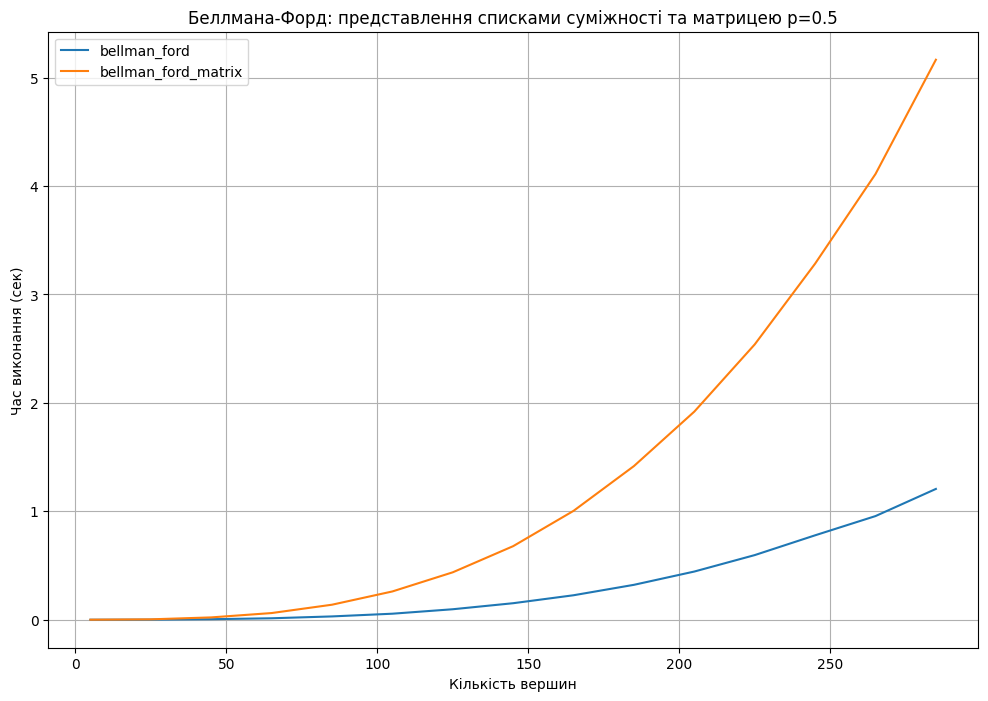

In [62]:
plt.figure(figsize=(12, 8))

for name in avg_times_07.keys():
    if name != 'bellman_ford' and name != 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_05, avg_times_05[name], label=name)

plt.title('Беллмана-Форд: представлення списками суміжності та матрицею p=0.5')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

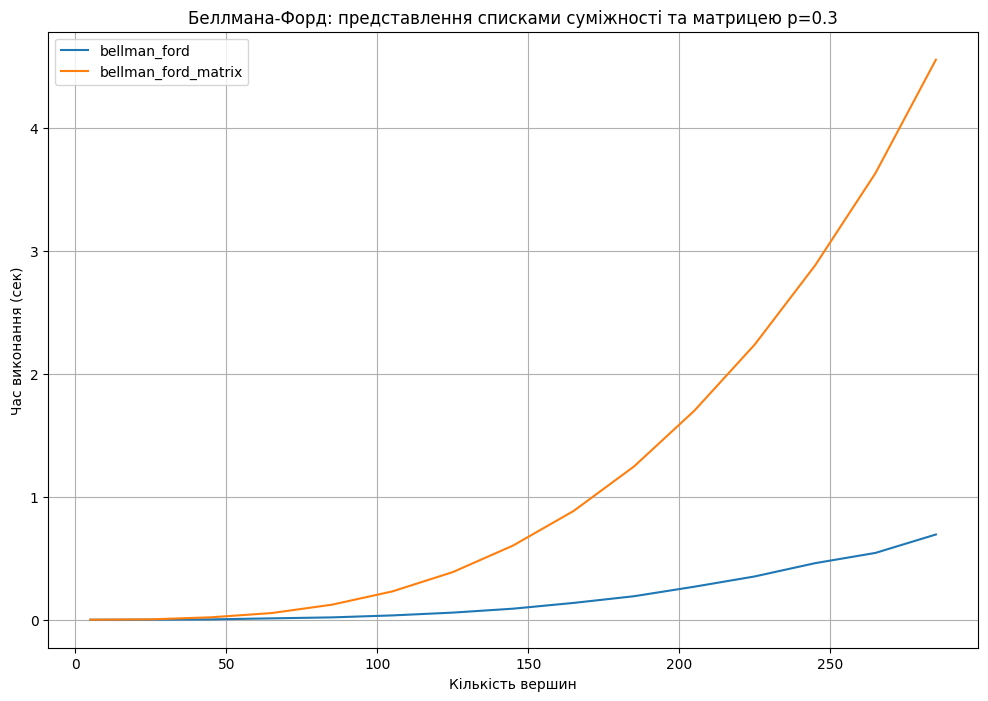

In [63]:
plt.figure(figsize=(12, 8))

for name in avg_times_07.keys():
    if name != 'bellman_ford' and name != 'bellman_ford_matrix':
        continue
    plt.plot(vertex_counts_03, avg_times_03[name], label=name)

plt.title('Беллмана-Форд: представлення списками суміжності та матрицею p=0.3')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()

In [32]:
avg_times_03.keys()

dict_keys(['dijkstra', 'dijkstra_h', 'dijkstra_m', 'dijkstra_mh', 'bellman_ford', 'bellman_ford_matrix'])

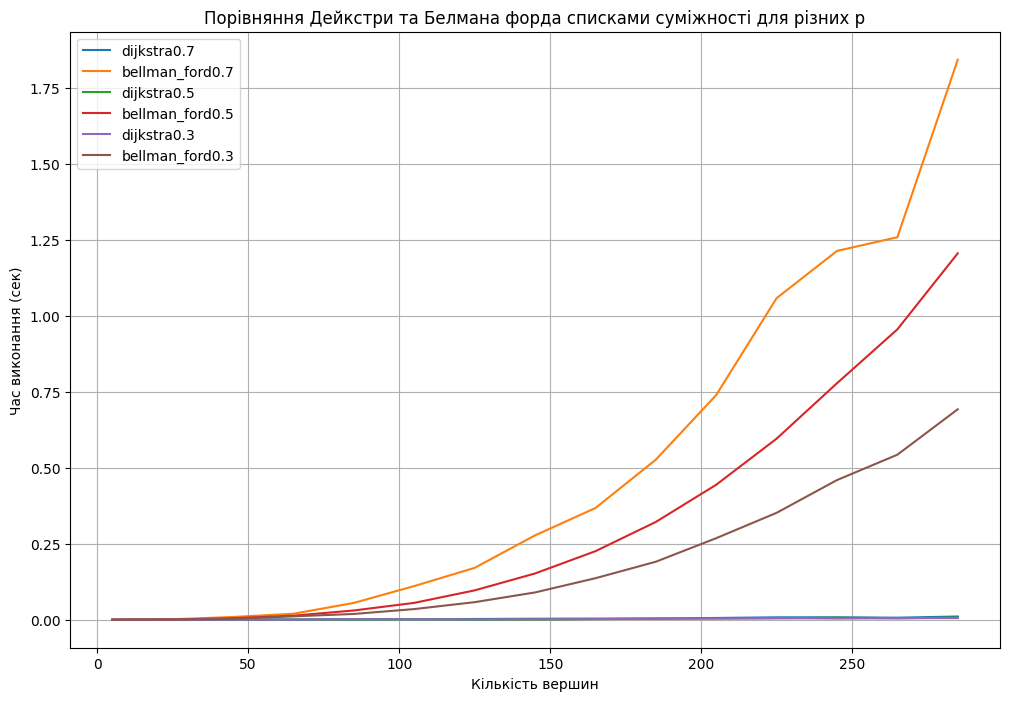

In [44]:
# Создаем график
plt.figure(figsize=(12, 8))
name1 = 'dijkstra'
name2 = 'bellman_ford'

plt.plot(vertex_counts_07, avg_times_07[name1], label=name1+'0.7')
plt.plot(vertex_counts_07, avg_times_07[name2], label=name2+'0.7')

plt.plot(vertex_counts_05, avg_times_05[name1], label=name1+'0.5')
plt.plot(vertex_counts_05, avg_times_05[name2], label=name2+'0.5')

plt.plot(vertex_counts_03, avg_times_03[name1], label=name1+'0.3')
plt.plot(vertex_counts_03, avg_times_03[name2], label=name2+'0.3')

plt.title('Порівняння Дейкстри та Белмана форда списками суміжності для різних p')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()